## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 10^{-10}~\varepsilon / k_B$;
   - Конечная температура: $T_f = 2.8~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения, среднеквадратичное смещение и коэффициенты самодиффузии рассчитывалась через каждые 5000 шагов;
   - Подсчёт состоял из 2499 шагов: 500 на уравновешивание системы при фиксированной температуре и 1999 на усреднение по ансамблям (к первому ансамблю относятся шаги с 1 по 1000 шаг, ко второму - с 2 по 1001 и т.д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые 1000 шагов;

#### Импорт необходимых библиотек

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

#### Настройки графиков

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
CURRENT_DATA = '2021-04-16'
PLOT_FILENAME_POSTFIX = 'cooling'

In [4]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, CURRENT_DATA)
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, CURRENT_DATA)

#### Параметры, при которых были подчитаны функции радиального распределения, среднеквадратичные смещения и т.д.

In [5]:
setups = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf'):
        parts = filename.split('_')
        setup = {
            'temperature': float(parts[2]), 
            'pressure': float(parts[4]), 
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
            
        }
        setups.append(setup)
        
setups

[{'temperature': 0.99962, 'pressure': -2.18977, 'heating_velocity': 0.02},
 {'temperature': 1.00283, 'pressure': 0.91036, 'heating_velocity': 0.02},
 {'temperature': 1.50566, 'pressure': 2.08292, 'heating_velocity': None},
 {'temperature': 1.51506, 'pressure': 2.06074, 'heating_velocity': None}]

#### Извлечение значений функции радиального распределения из файлов

In [6]:
pp = PostProcessor(
    path_to_data=PATH_TO_CURRENT_DATA, 
    path_to_plots=PATH_TO_CURRENT_PLOTS, 
    plot_filename_postfix=PLOT_FILENAME_POSTFIX, 
    setups=setups,
)
pp.msd.data

,time,setup_0,setup_1,setup_2,setup_3
0,0.005,0.000000,0.000000,0.000000,0.000000
1,0.010,0.000075,0.000075,0.000115,0.000114
2,0.015,0.000300,0.000301,0.000458,0.000457
3,0.020,0.000673,0.000675,0.001027,0.001025
4,0.025,0.001192,0.001196,0.001818,0.001815
...,...,...,...,...,...
1995,9.980,5.278605,5.518834,8.366940,7.926216
1996,9.985,5.281183,5.521654,8.371232,7.930077
1997,9.990,5.283758,5.524479,8.375520,7.933938
1998,9.995,5.286327,5.527305,8.379787,7.937800


#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

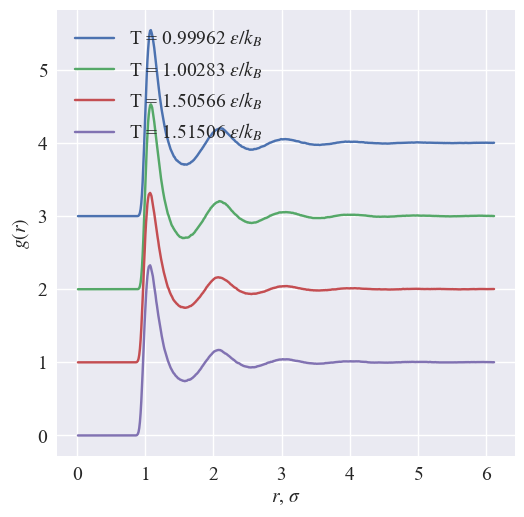

In [7]:
pp.plot_rdf(
#     left=0,
#     right=6.125,
#     bottom=0, 
#     top=8,
)

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

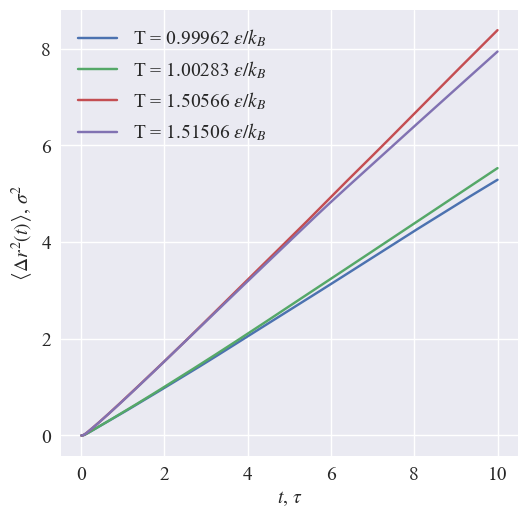

In [8]:
pp.plot_msd(
#     left=0,
#     right=5,
#     bottom=0, 
#     top=7,
)

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

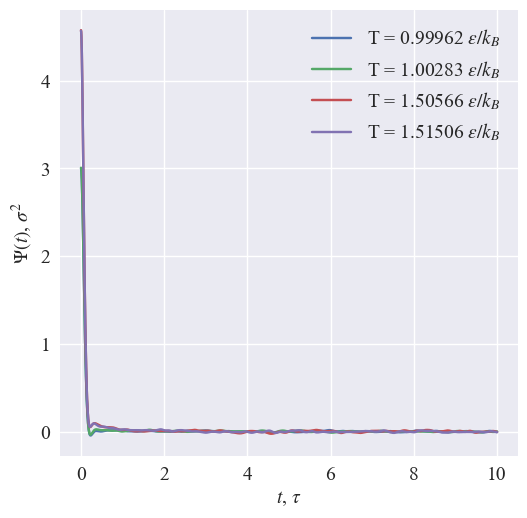

In [9]:
pp.plot_vaf(
#     left=0,
#     right=1,
#     bottom=0, 
#     top=20,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

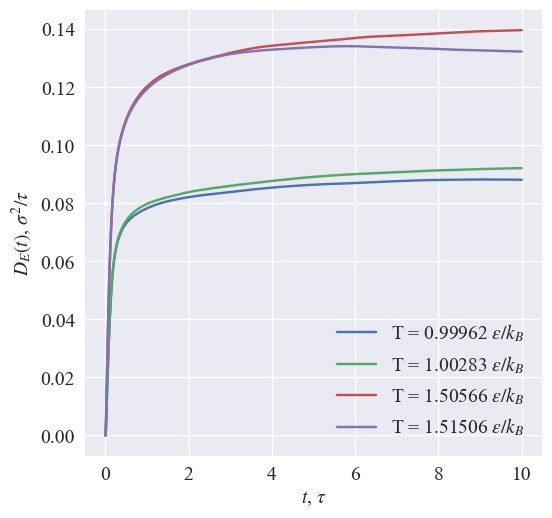

In [10]:
pp.plot_einstein_diffusion(
#     left=0,
#     right=8,
# #     bottom=0, 
#     top=0.25,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

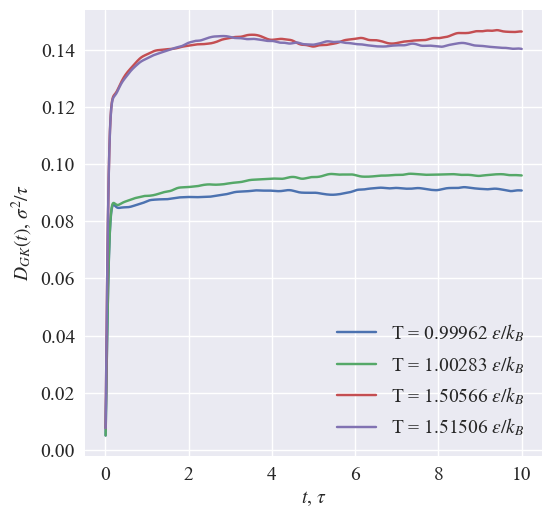

In [11]:
pp.plot_gk_diffusion(
#     left=0,
#     right=8,
# #     bottom=0, 
#     top=0.27,
)

#### Сравнение коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна и Грина-Кубо

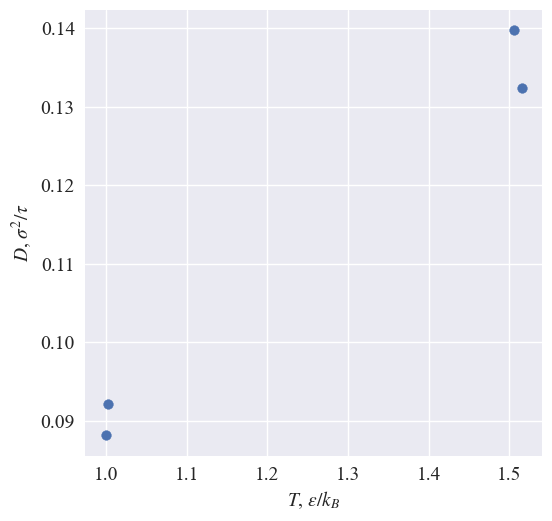

In [12]:
pp.plot_diffusion(
#     left=0, 
#     right=3,
#     bottom=0, 
#     top=0.1,
)

#### Извлечение параметров системы из файла

In [13]:
pp.system_parameters

,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume
0,1.00000,-2.18977,2057.2207,-7379.8687,-5322.6480,-16190.5910,0.0,0.0,1838.26562
1,0.99962,-2.17742,2055.6785,-7377.5400,-5321.8613,-16119.3910,0.0,0.0,1838.26562
2,0.99925,-2.15446,2054.0503,-7373.6387,-5319.5884,-15989.5230,0.0,0.0,1838.26562
3,0.99883,-2.12541,2052.0251,-7367.7120,-5315.6865,-15825.2780,0.0,0.0,1838.26562
4,0.99827,-2.08932,2049.3510,-7359.1396,-5309.7886,-15620.8880,0.0,0.0,1838.26562
...,...,...,...,...,...,...,...,...,...
29995,1.51947,2.06165,3121.4302,-5526.5590,-2405.1290,5126.7354,0.0,0.0,1838.26562
29996,1.51977,2.05992,3122.3936,-5527.6230,-2405.2295,5115.2730,0.0,0.0,1838.26562
29997,1.52035,2.05838,3123.0881,-5528.4490,-2405.3610,5105.3440,0.0,0.0,1838.26562
29998,1.52035,2.05841,3121.8271,-5527.2140,-2405.3867,5108.0600,0.0,0.0,1838.26562


#### Зависимость температуры системы от времени

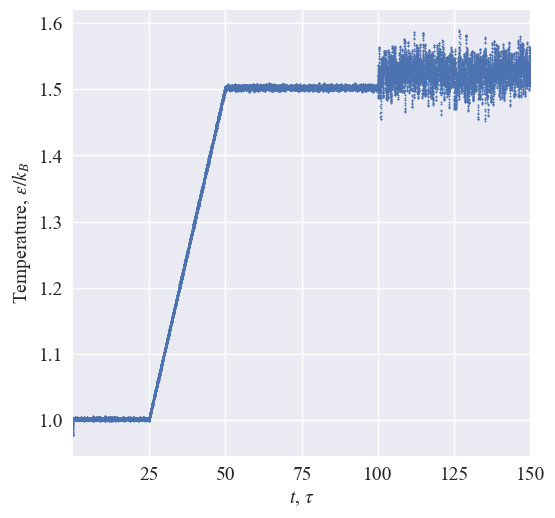

In [14]:
pp.plot_system_parameters(
    column_names=['temperature',],
    y_label=r'Temperature, $\epsilon / k_B$',
#     bottom=2.75,
#     top=3,
);

#### Зависимость давления системы от времени

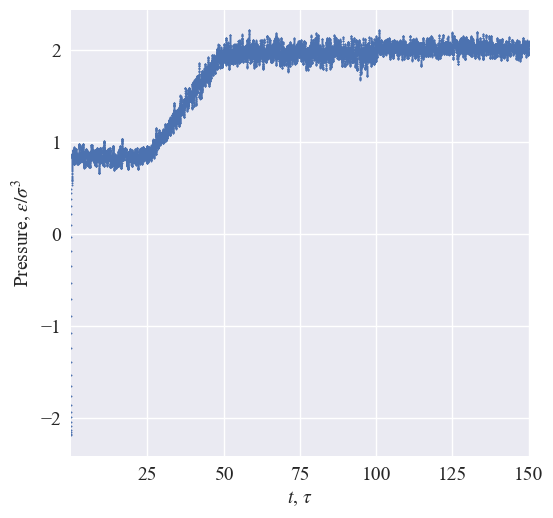

In [15]:
pp.plot_system_parameters(
    column_names=['pressure',],
    y_label=r'Pressure, $\epsilon / \sigma^3 $',
#     bottom=-1,
#     top=5,
);

#### Зависимость кинетической энергии системы от времени

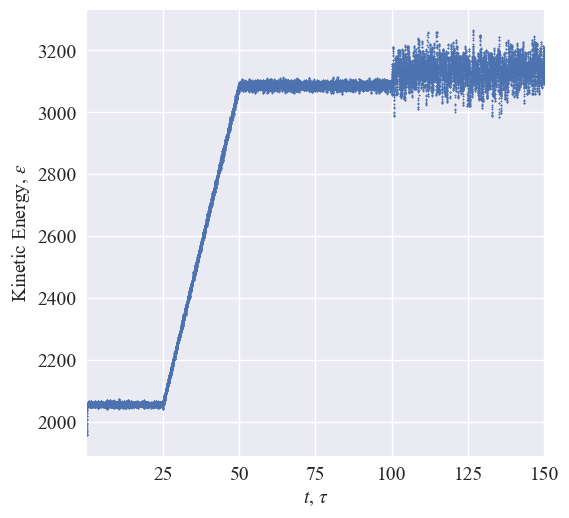

In [16]:
pp.plot_system_parameters(
    column_names=['kinetic_energy',],
    y_label=r'Kinetic Energy, $\epsilon$',
#     bottom=-1,
#     top=6000,
);

#### Зависимость потенциальной энергии системы от времени

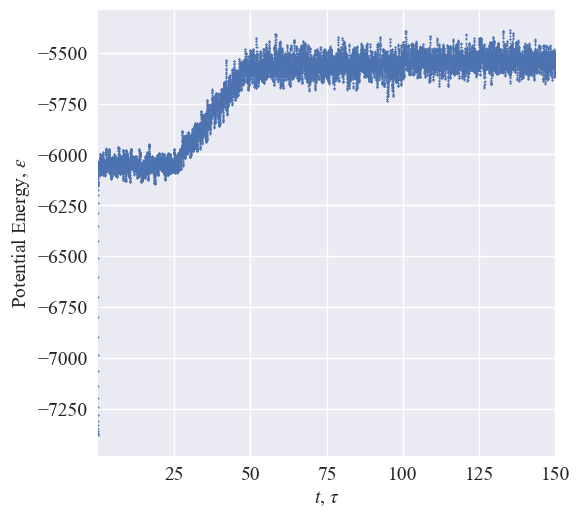

In [17]:
pp.plot_system_parameters(
    column_names=['potential_energy',],
    y_label=r'Potential Energy, $\epsilon$',
#     bottom=-10000,
#     top=-4000,
);

#### Зависимость полной энергии системы от времени

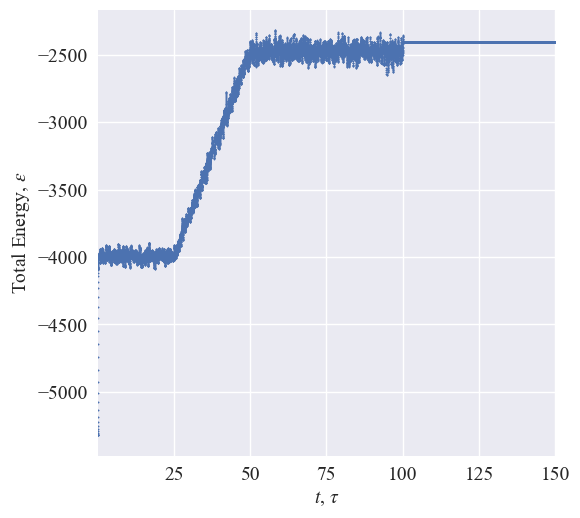

In [18]:
pp.plot_system_parameters(
    column_names=['total_energy',],
    y_label=r'Total Energy, $\epsilon$',
#     bottom=-10000,
#     top=2000,
);

#### Энергии на одном графике

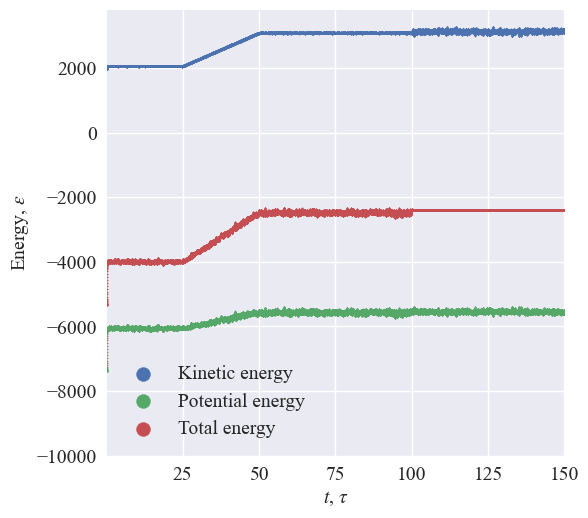

In [19]:
pp.plot_system_parameters(
    column_names=['kinetic_energy', 'potential_energy', 'total_energy'],
    y_label=r'Energy, $\epsilon$',
    bottom=-10000,
#     top=2000,
);

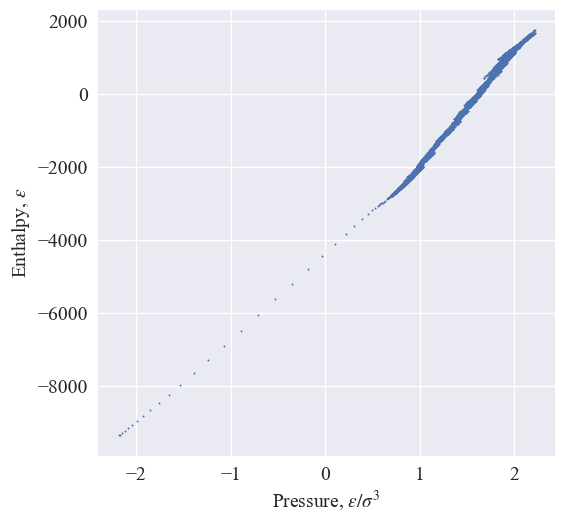

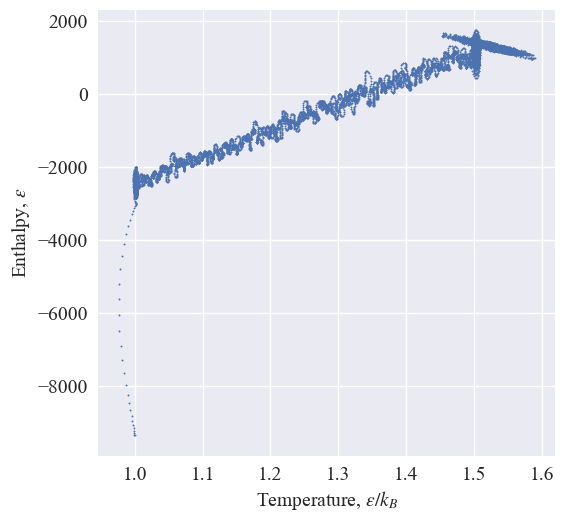

In [20]:
enthalpy = pp.get_enthalpy()

plt.scatter(pp.system_parameters['pressure'], enthalpy, s=1);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $',)
plt.ylabel(r'Enthalpy, $\epsilon$',)

plt.show();
plt.scatter(pp.system_parameters['temperature'], enthalpy, s=1);
plt.xlabel(r'Temperature, $\epsilon / k_B$',)
plt.ylabel(r'Enthalpy, $\epsilon$',)
plt.show();

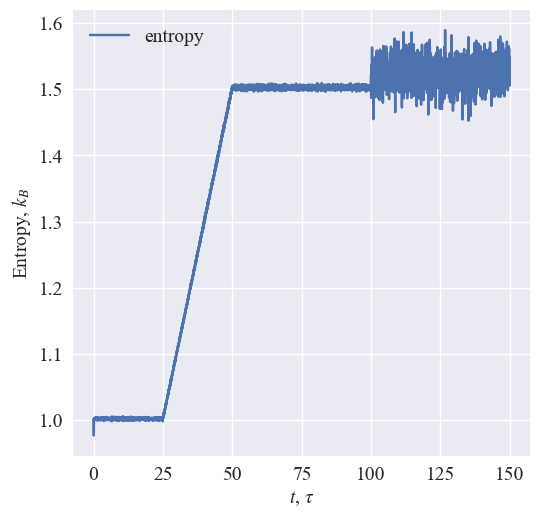

In [21]:
times = (pp.system_parameters.index + 1) * 0.005

pp.system_parameters['entropy'] = pp.get_entropy()

plt.plot(times, pp.system_parameters['entropy'], label='entropy');
# plt.plot(
#     times, 
#     pp.system_parameters['total_energy'] 
#     + pp.system_parameters['pressure'] * pp.system_parameters['volume'] / pp.system_parameters['temperature'], 
#     label='not entropy'
# );
plt.xlabel(r'$t$, $\tau$')
plt.ylabel(r'Entropy, $k_B$',)
# plt.xlim(
#     left=0,
#     right=45,
# );
# plt.ylim(
#     top=500,
#     bottom=-50000,
# );
plt.legend();

In [22]:
pp.get_free_energy()
pp.get_gibbs_energy()

0       -9348.026907
1       -9325.324326
2       -9283.117456
3       -9229.714554
4       -9163.367646
            ...     
29995   -2792.146519
29996   -2796.151390
29997   -2800.576645
29998   -2800.521497
29999   -2792.774933
Name: gibbs_energy, Length: 30000, dtype: float64

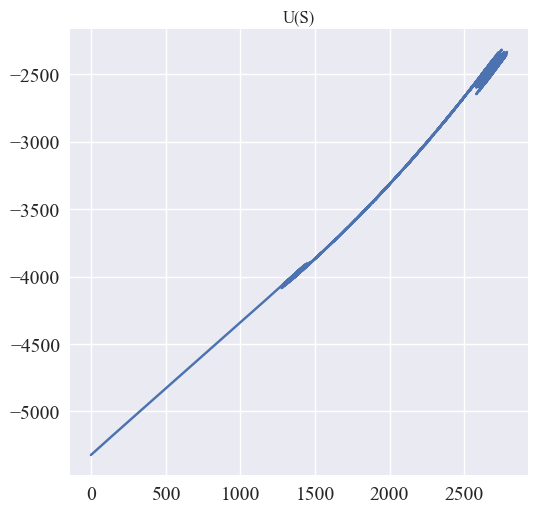

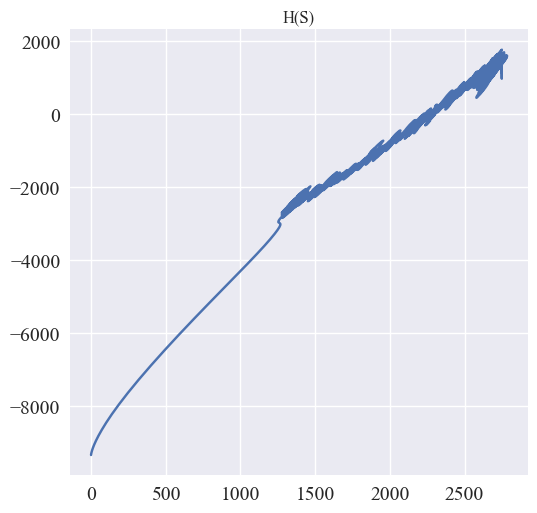

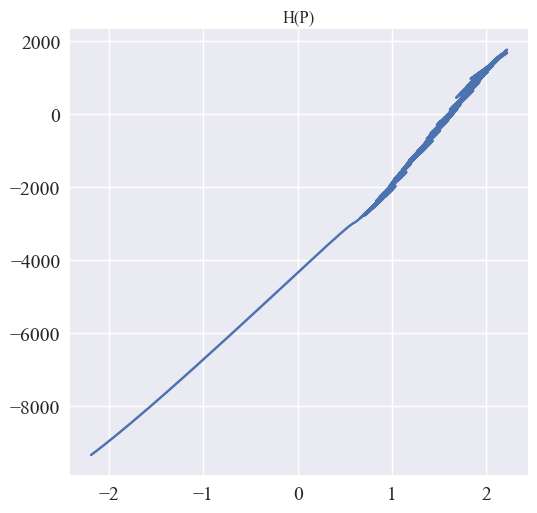

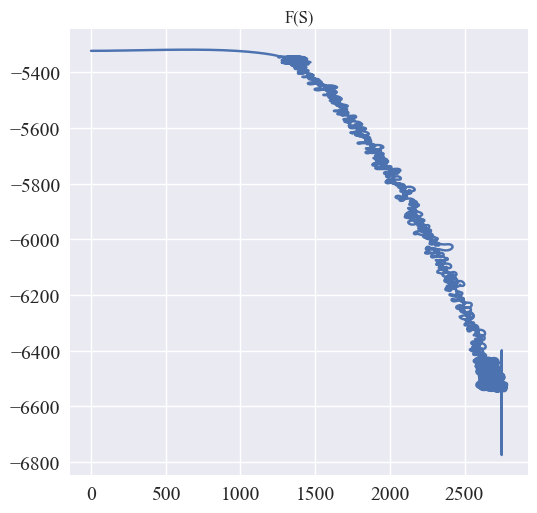

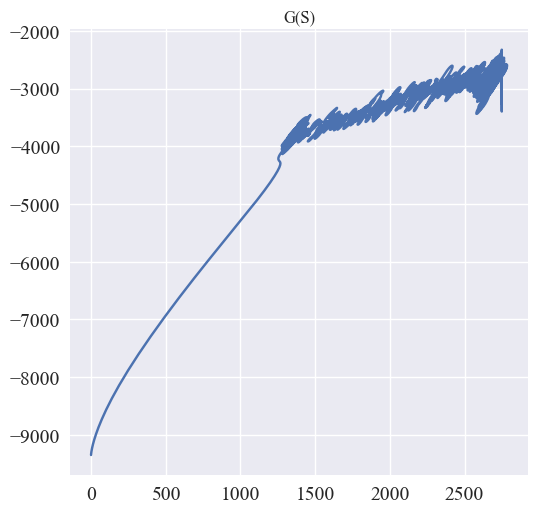

In [23]:
plt.plot(
    pp.system_parameters['entropy'],
    pp.system_parameters['total_energy'],
);
plt.title('U(S)');
plt.show();

plt.plot(
    pp.system_parameters['entropy'],
    pp.system_parameters['enthalpy'],
);
plt.title('H(S)');
plt.show();

plt.plot(
    pp.system_parameters['pressure'],
    pp.system_parameters['enthalpy'],
);
plt.title('H(P)');
plt.show();

plt.plot(
    pp.system_parameters['entropy'],
    pp.system_parameters['free_energy'],
);
plt.title('F(S)');
plt.show();

plt.plot(
    pp.system_parameters['entropy'],
    pp.system_parameters['gibbs_energy'],
);
plt.title('G(S)');
plt.show();